#Imports


In [45]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from torch import nn
from yellowbrick.classifier import ClassificationReport
from imblearn.under_sampling import RandomUnderSampler

#import models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

# Load Data

Build data frame


In [46]:
df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
y = df['DX_GROUP']
df = df.loc[:,'anat_cnr':'func_gsr'] #slice df for only fMRI data
df['DX_GROUP'] = y #add column back in to data frame
df = df.dropna() #drop na values

print(df.shape)

(1099, 17)


Make training and testing dataset

In [47]:
y = df['DX_GROUP'].values
x = df.loc[:,'anat_cnr':'func_gsr'].values


#normalize values
scaler = StandardScaler()
norm_x = scaler.fit_transform(x) 

#undersample data
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(norm_x, y)

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2,random_state=109) 



# Classification Metrics


In [48]:
def classMets(clf):
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  visualizer = ClassificationReport(clf, support=True)
  visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
  visualizer.score(X_test, y_test)  # Evaluate the model on the test data
  visualizer.show()

#Models

SVM

Accuracy: 0.6179245283018868


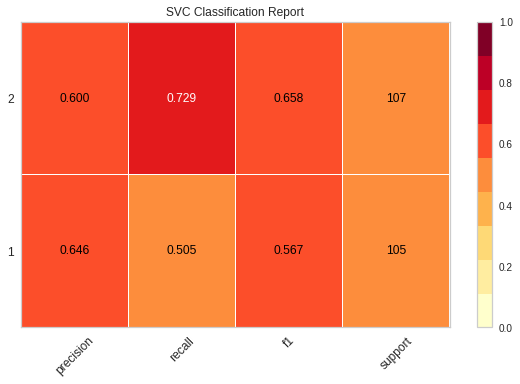

In [49]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Classification metrics
classMets(clf)   

Random Forest

Accuracy: 0.7358490566037735


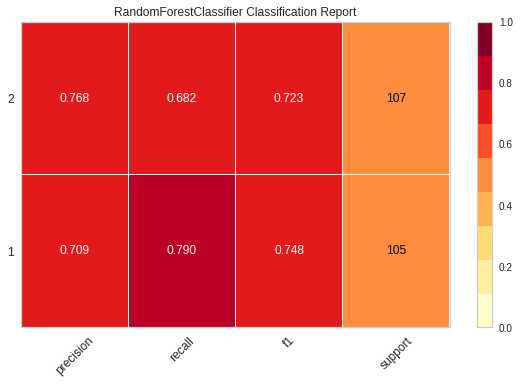

In [50]:
# create a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)

#Classification metrics
classMets(clf)

K-Nearest Neighbors

Accuracy: 0.6556603773584906


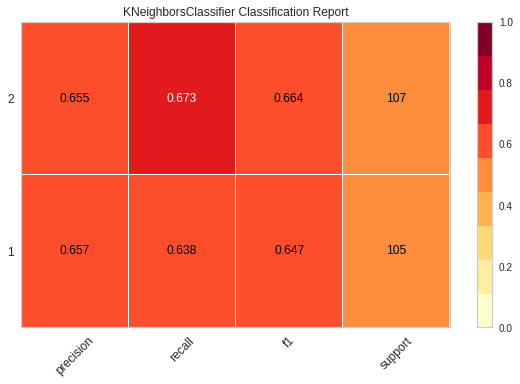

In [51]:
#create a KNN classifier
clf = KNeighborsClassifier(n_neighbors = 3)

#train the model on the training dataset
clf.fit(X_train, y_train)

#make predictions on the test dataset
y_pred = clf.predict(X_test)

#classification metrics
classMets(clf)

Multilayer Perceptron

Accuracy: 0.6462264150943396


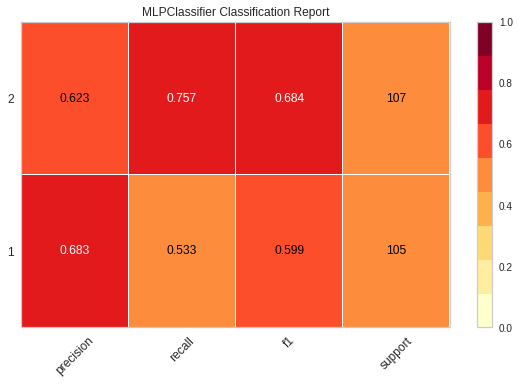

In [52]:
#create a MLP classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), 
                    random_state=1, max_iter=5000, activation = "relu")

#train the model on the training dataset
clf.fit(X_train, y_train)

#make predictions on the testing datset
y_pred = clf.predict(X_test)

#classification metrics
classMets(clf)

Gaussian Naive Bayes 

Accuracy: 0.5943396226415094


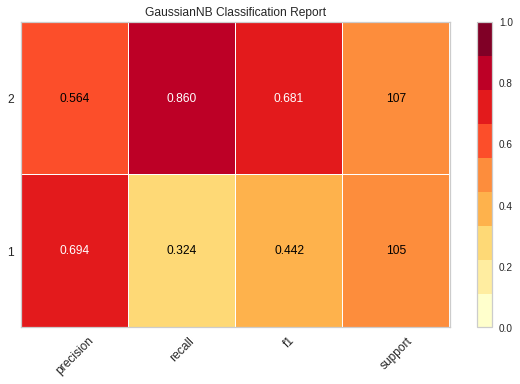

In [53]:
#create a Naive Bayes Classifier
clf = GaussianNB()

#train the model on the training dataset
clf.fit(X_train, y_train)

#make predictions on the testing datset
y_pred = clf.predict(X_test)

#classification metrics
classMets(clf) 

Decision Tree

Accuracy: 0.6792452830188679


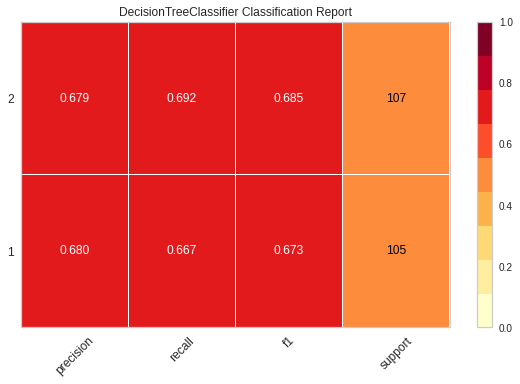

In [54]:
#create a decision tree classifier
clf = tree.DecisionTreeClassifier()

#train the model on the training datset
clf.fit(X_train, y_train)

#make predictions on the testing datset
y_pred = clf.predict(X_test)

#classification metrics
classMets(clf)